<a href="https://colab.research.google.com/github/Jacquedelest/Retail-Selling-2019/blob/master/Monthly_GMV_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset

In [9]:
import pandas as pd

retail = pd.read_csv('retail_raw_reduced.csv')
print('Dataset size: %d rows and %d columns\n' % retail.shape)
print('First five data: ')
retail.head()

Dataset size: 5000 rows dan 9 columns

First five data: 


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


Create column `month` from column `date`

In [12]:
import datetime

retail['order_month'] = retail['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d" ).strftime('%m-%Y'))
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,10-2019
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,10-2019
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,11-2019
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,08-2019
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,10-2019


Create column `gmv`from `item_price`*`quantity`

In [13]:
retail['gmv'] = retail['item_price']*retail['quantity']

print('Dataset size: %d rows and %d columns\n' % retail.shape)
print('First five data:')
retail.head()

Dataset size: 5000 rows and 11 columns

First five data:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,10-2019,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,10-2019,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,11-2019,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,08-2019,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,10-2019,8950000


Aggregate data

In [17]:
monthly_amount = retail.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,07-2019,3524041000
1,08-2019,4452923000
2,09-2019,3947002000
3,10-2019,6719937000
4,11-2019,6182229000
5,12-2019,8148235000


Line chart of GMV growth

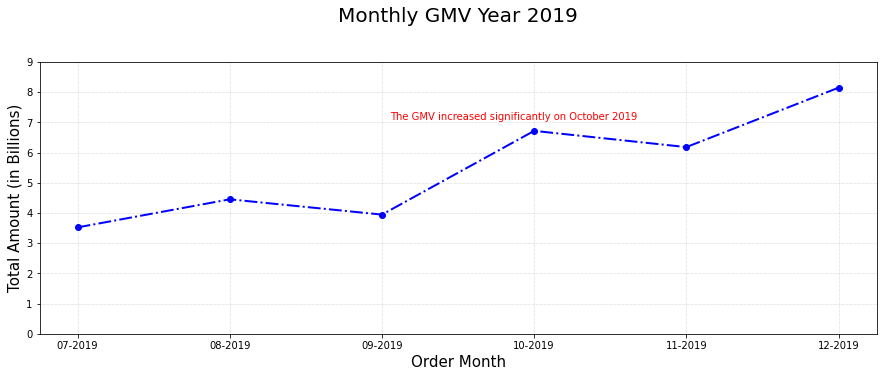

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'], color='blue', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='black')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0) #min and max axis ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red') #add information in plot
plt.savefig('monthly_gmv.png', quality=95)
plt.show()